## model Training


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier, MLPRegressor

import xgboost as xgb
import catboost as cb

from sklearn.metrics import  mean_squared_error, r2_score,mean_absolute_error
import warnings


In [5]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [6]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## preparing X and Y variables

In [8]:
X=df.drop(columns=["math score"],axis=1)

In [10]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [9]:
y=df["math score"]

In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

## using column Transformer to apply the Standard scaler and one hot encoder

In [12]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

In [13]:
num_features

Index(['reading score', 'writing score'], dtype='object')

In [14]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [24]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("onehotencoder",oh_transformer,cat_features),
        ("standardScaler",numeric_transformer,num_features),
    ]
)


In [26]:
X=preprocessor.fit_transform(X)

In [28]:
X.shape

(1000, 19)

## spliting the data using train test split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [36]:
def evalute_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [42]:
models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "KNN": KNeighborsRegressor(),
        "SVR": SVR(),
        "DecisionTree": DecisionTreeRegressor(),
        "RandomForest": RandomForestRegressor(),
        "AdaBoost": AdaBoostRegressor(),
        "XGBoost": xgb.XGBRegressor(),
        "CatBoost": cb.CatBoostRegressor(verbose=0)
    }
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_mae,model_train_rmse,model_train_r2=evalute_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evalute_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("model performance for Training set")
    print("root mean squared error:{}".format(model_train_rmse))
    print("mean absolute error:{}".format(model_train_mae))
    print("r2_Score:{}".format(model_train_r2))
    
    print("-----------------------------------")
    
    print("model performance for Testing set")
    print("root mean squared error:{}".format(model_test_rmse))
    print("mean absolute error:{}".format(model_test_mae))
    print("r2_Score:{}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("="*35)
    print("\n")
        
    

LinearRegression
model performance for Training set
root mean squared error:5.288059499550335
mean absolute error:4.223101484557184
r2_Score:0.8835424726456637
-----------------------------------
model performance for Testing set
root mean squared error:5.481280391560365
mean absolute error:4.355804761432846
r2_Score:0.8524044611540385


Ridge
model performance for Training set
root mean squared error:5.288423406893323
mean absolute error:4.221484653923268
r2_Score:0.8835264436249715
-----------------------------------
model performance for Testing set
root mean squared error:5.472921288651946
mean absolute error:4.34759910433527
r2_Score:0.8528542923782233


Lasso
model performance for Training set
root mean squared error:6.564529609256451
mean absolute error:5.132363304532038
r2_Score:0.8205340253539211
-----------------------------------
model performance for Testing set
root mean squared error:6.445932236752009
mean absolute error:5.171669943994834
r2_Score:0.7958823005942476


KNN

## Results

In [43]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["model name","r2_score"]).sort_values(by=["r2_score"],ascending=False)

,model name,r2_score
1,Ridge,0.852854
0,LinearRegression,0.852404
9,CatBoost,0.834243
6,RandomForest,0.828732
8,XGBoost,0.812107
7,AdaBoost,0.807220
4,SVR,0.796861
2,Lasso,0.795882
3,KNN,0.767906
5,DecisionTree,0.683131


# out of all the linear regression is the best one

In [46]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 85.24


## plot y_pred to y_test

Text(0, 0.5, 'predicted values')

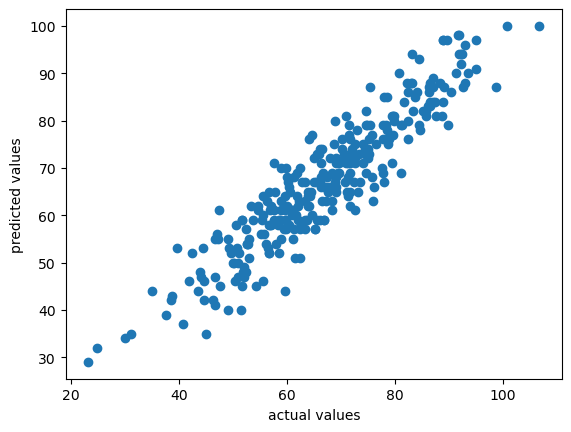

In [48]:
plt.scatter(y_pred,y_test)
plt.xlabel("actual values")
plt.ylabel("predicted values")

<Axes: xlabel='math score'>

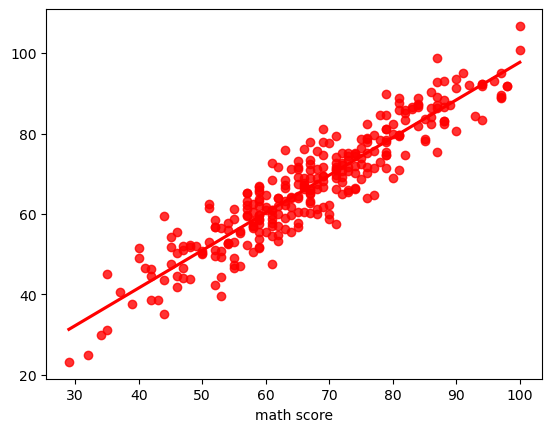

In [50]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

## Difference between the Actual values and Predicted values

In [51]:
pred_df=pd.DataFrame({"actual value":y_test,"predicted value":y_pred,"difference":y_test-y_pred})
pred_df

,actual value,predicted value,difference
841,64,59.627466,4.372534
956,84,88.831501,-4.831501
544,64,55.528583,8.471417
173,63,62.146403,0.853597
759,69,81.063145,-12.063145
...,...,...,...
949,57,65.132207,-8.132207
802,87,92.685916,-5.685916
293,65,71.666474,-6.666474
414,51,62.373354,-11.373354
